In [1]:
from watschel_env.envs.policy_network import REINFORCE, Policy_Network
import torch, random
import numpy as np

import gymnasium as gym

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

YAYY


In [2]:
def plot_reward_curve(rewards_over_episodes) :
    rewards_to_plot = rewards_over_episodes
    df1 = pd.DataFrame(rewards_to_plot).melt()
    df1.rename(columns={"variable": "episodes", "value": "reward"}, inplace=True)
    sns.set(style="darkgrid", context="talk", palette="rainbow")
    sns.lineplot(x="episodes", y="reward", data=df1).set(
        title="REINFORCE for WatschelWorld-v0"
    )
    plt.show()

/root/miniconda3/envs/reinforcement_learning/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/root/miniconda3/envs/reinforcement_learning/lib/python3.8/site-packages/gymnasium/spaces/box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
/root/miniconda3/envs/reinforcement_learning/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(


Episode: 0 Average Reward: -171


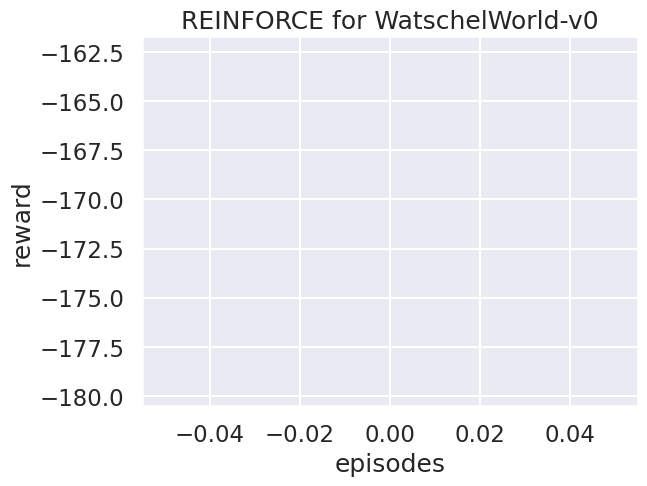

Episode: 10 Average Reward: -167


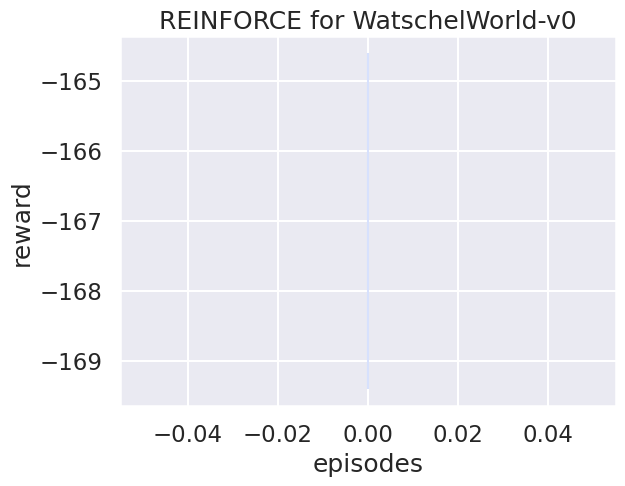

Episode: 20 Average Reward: -163


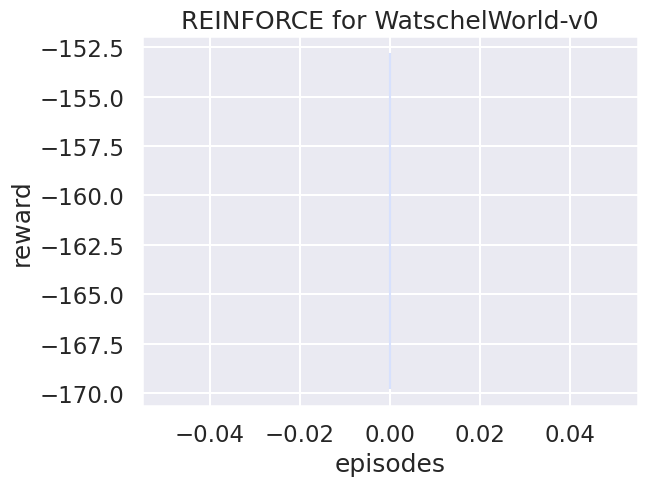

Episode: 30 Average Reward: -161


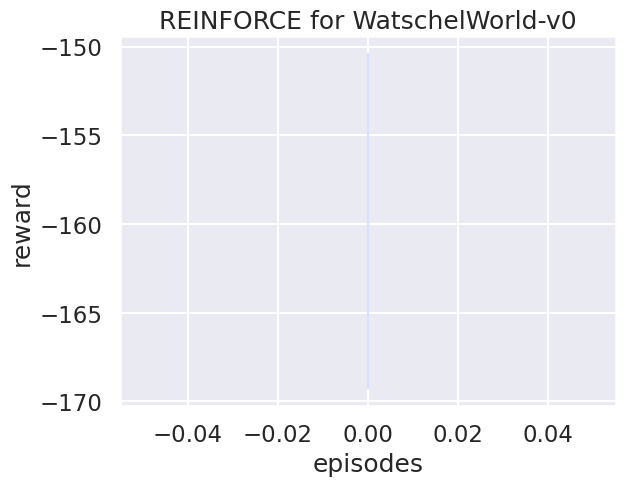

Episode: 40 Average Reward: -157


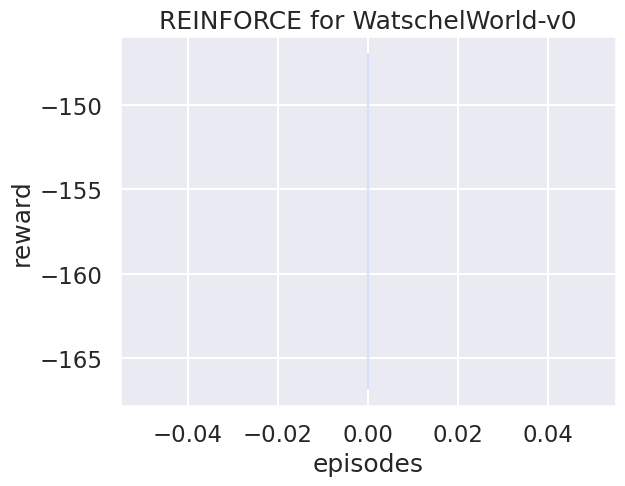

Episode: 50 Average Reward: -159


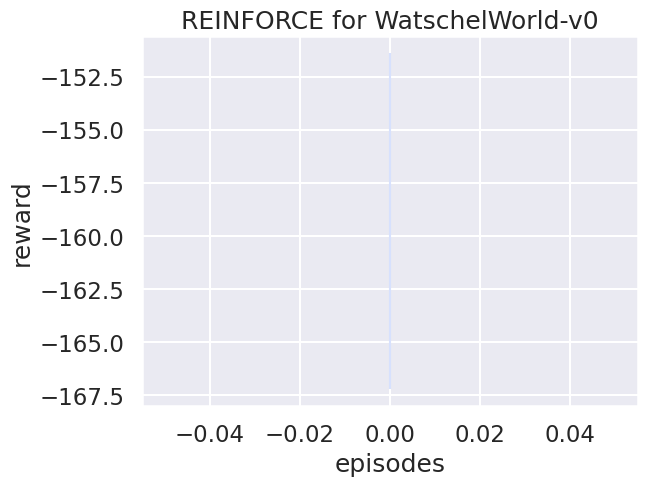

Episode: 60 Average Reward: -159


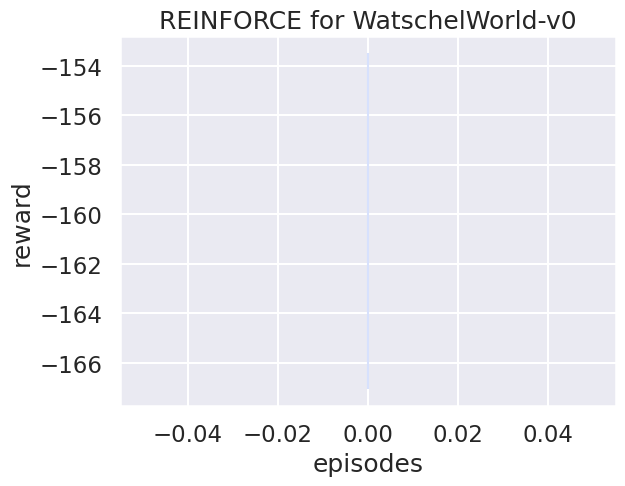

Episode: 70 Average Reward: -159


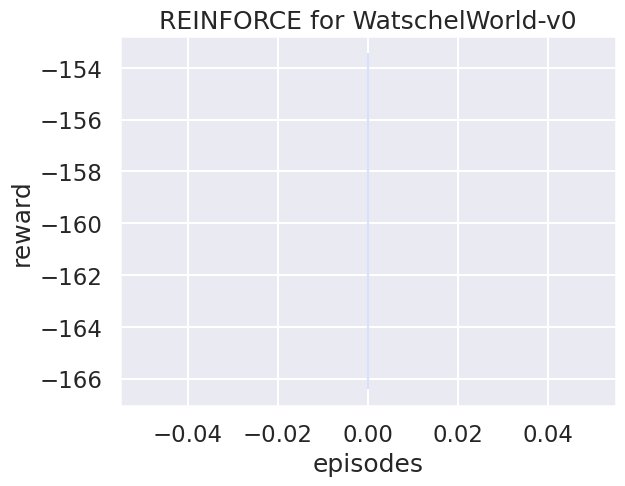

KeyboardInterrupt: 

In [6]:
# Create and wrap the environment
env = gym.make("watschel_env/watschelworld-v0")
wrapped_env = gym.wrappers.RecordEpisodeStatistics(env, 50)  # Records episode-reward

total_num_episodes = int(5e3)  # Total number of episodes
# Observation-space of InvertedPendulum-v4 (4)
obs_space_dims = env.observation_space["legs"].shape[0] + env.env.observation_space["position"].shape[0]
# Action-space of InvertedPendulum-v4 (1)
action_space_dims = env.action_space.shape[0]
rewards_over_seeds = []

for seed in [1, 2, 3, 5, 8]:  # Fibonacci seeds
    # set seed
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

    # Reinitialize agent every seed
    agent = REINFORCE(obs_space_dims, action_space_dims)
    reward_over_episodes = []


    for episode in range(total_num_episodes):


        # gymnasium v26 requires users to set seed while resetting the environment
        obs, info = wrapped_env.reset(seed=seed)
        obs = (obs["legs"] + obs["position"])

        done = False
        while not done:
            action = agent.sample_action(obs)

            # Step return type - `tuple[ObsType, SupportsFloat, bool, bool, dict[str, Any]]`
            # These represent the next observation, the reward from the step,
            # if the episode is terminated, if the episode is truncated and
            # additional info from the step
            obs, reward, terminated, truncated, info = wrapped_env.step(action)
            obs = (obs["legs"] + obs["position"])
            agent.rewards.append(reward)

            # End the episode when either truncated or terminated is true
            #  - truncated: The episode duration reaches max number of timesteps
            #  - terminated: Any of the state space values is no longer finite.
            done = terminated or truncated

        reward_over_episodes.append(wrapped_env.return_queue[-1])
        agent.update()



        if episode % 20 == 0:
            avg_reward = int(np.mean(wrapped_env.return_queue))
            print("Episode:", episode, "Average Reward:", avg_reward)
            agent.save()

    rewards_over_seeds.append(reward_over_episodes)